In [1]:
# Import Libraries
import os
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Visuzliation Setting
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
from matplotlib import colors
import seaborn as sns

In [48]:
color_palette = 'Set3'
title_size = 20
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'

# 연어, 오징어, 새우 EDA 다시하기

In [3]:
#df_raw = pd.read_excel(os.path.join(root, 'train.xlsx'))
df_raw = pd.read_excel("C:/python/빅콘데이터/train.xlsx")
df_train = df_raw.copy()

In [4]:
df_train['date'] = df_train['REG_DATE'].dt.year.astype('str') + df_train['REG_DATE'].dt.month.astype('str').str.zfill(2)

In [5]:
df_train['date']

0        201512
1        201512
2        201512
3        201512
4        201512
          ...  
42068    201912
42069    201912
42070    201912
42071    201912
42072    201912
Name: date, Length: 42073, dtype: object

Text(0.5, 1.0, 'Category 1')

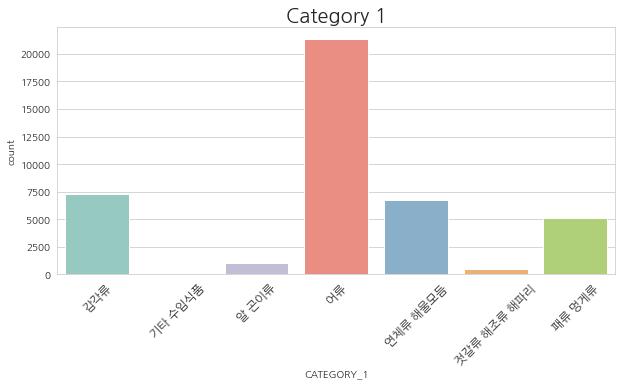

In [6]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
sns.countplot(df_train['CATEGORY_1'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('Category 1', fontsize=title_size)

# 어류 중 연어 분석

Text(0.5, 1.0, '어류의 CATEGORY')

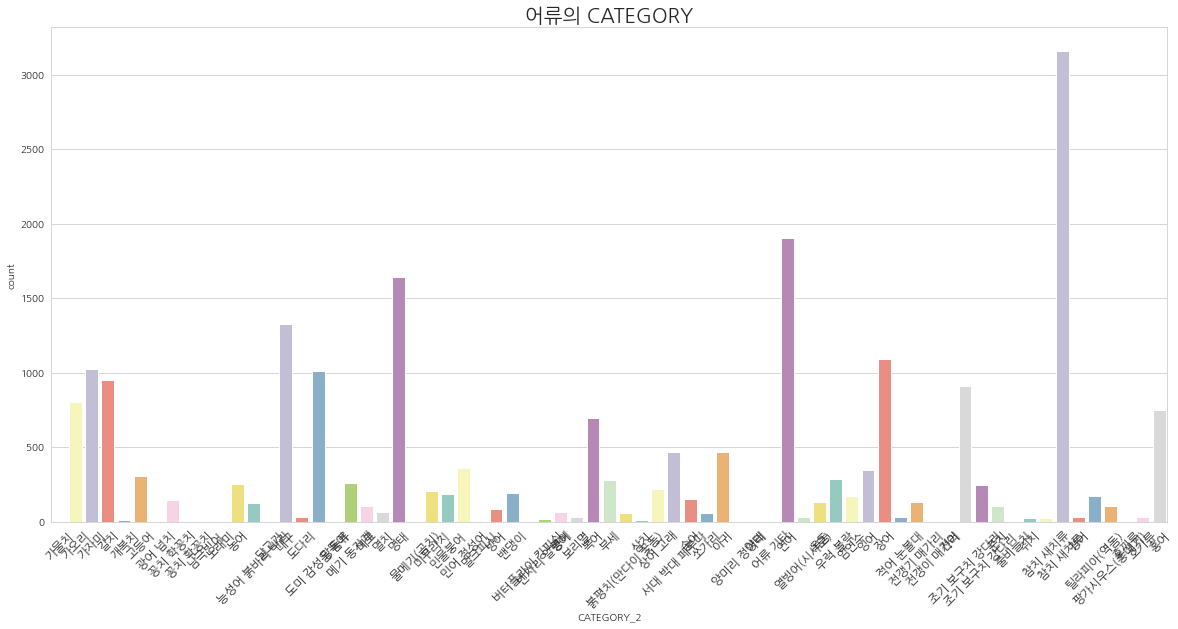

In [7]:
# 어류만 분류
is_fish = df_train['CATEGORY_1'].str.contains("어류",na=False)
df_fish = df_train[is_fish]

plt.figure(figsize=(20, 20))

plt.subplot(2, 1, 1)
sns.countplot(df_fish['CATEGORY_2'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('어류의 CATEGORY', fontsize=title_size)

# 어류 중 연어 분석

Text(0.5, 1.0, '어류의 CATEGORY')

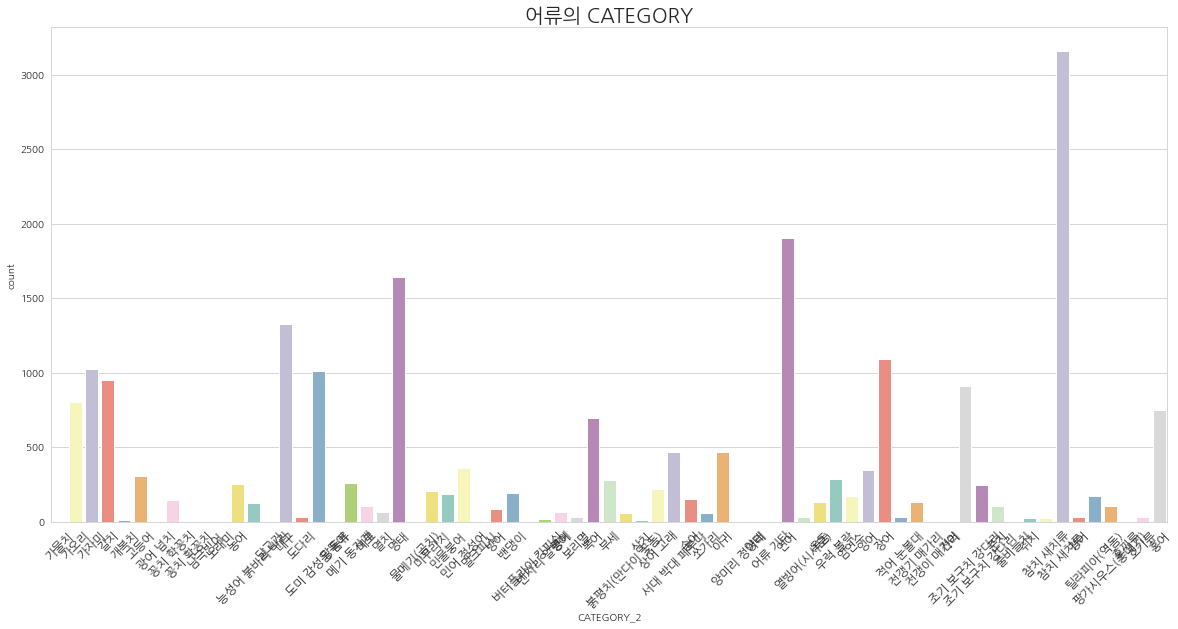

In [8]:
# 어류만 분류
is_fish = df_train['CATEGORY_1'].str.contains("어류",na=False)
df_fish = df_train[is_fish]

plt.figure(figsize=(20, 20))

plt.subplot(2, 1, 1)
sns.countplot(df_fish['CATEGORY_2'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('어류의 CATEGORY', fontsize=title_size)

In [9]:
print(df_fish['CATEGORY_2'].value_counts())

참치 새치류       3159
연어           1905
명태           1640
대구           1325
장어           1093
             ... 
망둑어             2
물메기(곰치)         1
호끼류             1
가물치             1
버터플라이 킹피쉬       1
Name: CATEGORY_2, Length: 69, dtype: int64


Text(0.5, 1.0, '연어 CTRY_2')

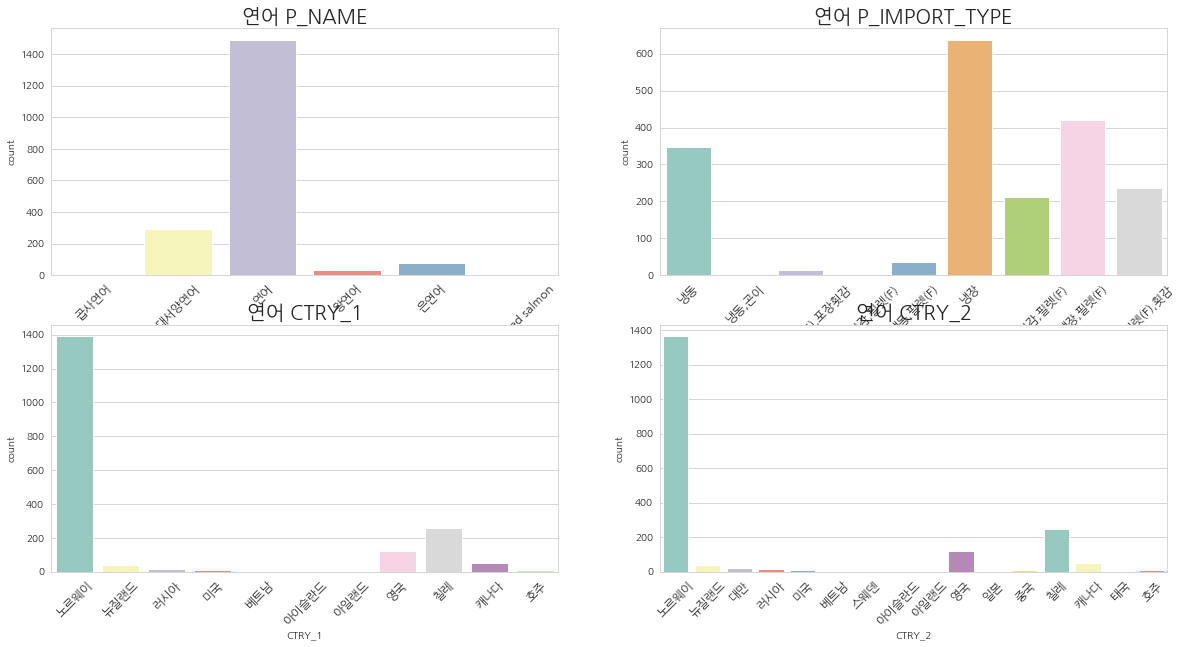

In [10]:
# 연어만 분류
is_salmon = df_fish['CATEGORY_2'].str.contains("연어",na=False)
df_salmon = df_fish[is_salmon]

df_salmon.loc[df_salmon['CTRY_1']==df_salmon['CTRY_2'], "comp"] = '같음'
df_salmon.loc[df_salmon['CTRY_1']!=df_salmon['CTRY_2'], "comp"] = '다름'

plt.figure(figsize=(20, 10))

plt.subplot(221)
sns.countplot(df_salmon['P_NAME'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('연어 P_NAME', fontsize=title_size)

plt.subplot(222)
sns.countplot(df_salmon['P_IMPORT_TYPE'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('연어 P_IMPORT_TYPE', fontsize=title_size)

plt.subplot(223)
sns.countplot(df_salmon['CTRY_1'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('연어 CTRY_1', fontsize=title_size)

plt.subplot(224)
sns.countplot(df_salmon['CTRY_2'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('연어 CTRY_2', fontsize=title_size)


In [11]:
# 제조국, 수출국 다른곳 찾기
df_salmon.loc[df_salmon['CTRY_1']==df_salmon['CTRY_2'], "comp"] = '같음'
df_salmon.loc[df_salmon['CTRY_1']!=df_salmon['CTRY_2'], "comp"] = '다름'
print(df_salmon['comp'].value_counts())

같음    1867
다름      38
Name: comp, dtype: int64


Text(0.5, 1.0, '연어 P_PURPOSE')

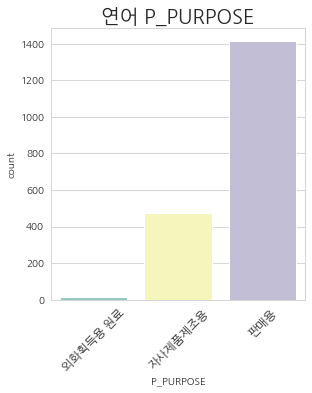

In [12]:
plt.figure(figsize=(10, 5))

plt.subplot(121)
sns.countplot(df_salmon['P_PURPOSE'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('연어 P_PURPOSE', fontsize=title_size)

제조국과 판매국에 따라서 뭐가다를지 보고싶음

<AxesSubplot:xlabel='REG_DATE'>

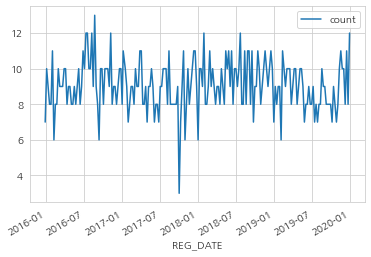

In [13]:
df_salmon.groupby('REG_DATE')['CTRY_1'].describe()['count'].plot(legend='count')

In [14]:
is_one = df_salmon['P_PURPOSE'].str.contains("외화획득용 원료",na=False)
df_one = df_salmon[is_one]

df_one

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,date,comp
8639,2016-11-07,수산물,러시아,러시아,외화획득용 원료,어류,연어,은연어,냉동,3.200000,201611,같음
8750,2016-11-07,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,2.884304,201611,같음
10135,2016-12-26,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,4.002672,201612,같음
18366,2017-10-16,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,4.633319,201710,같음
18590,2017-10-23,수산물,러시아,러시아,외화획득용 원료,어류,연어,"홍연어,Red salmon",냉동,7.500000,201710,같음
20345,2017-12-18,수산물,미국,미국,외화획득용 원료,어류,연어,"홍연어,Red salmon",냉동,6.410003,201712,같음
30224,2018-11-19,수산물,러시아,러시아,외화획득용 원료,어류,연어,곱사연어,냉동,1.850974,201811,같음
30767,2018-12-03,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,3.259972,201812,같음
31629,2018-12-31,수산물,러시아,러시아,외화획득용 원료,어류,연어,은연어,냉동,3.200000,201812,같음
32701,2019-02-11,수산물,러시아,러시아,외화획득용 원료,어류,연어,연어,냉동,1.900000,201902,같음


In [15]:
is_one = df_salmon['P_PURPOSE'].str.contains("자사제품제조용",na=False)
df_one = df_salmon[is_one]

df_one

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,date,comp
174,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,201512,같음
234,2016-01-04,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,냉장,8.966241,201601,같음
389,2016-01-04,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.760151,201601,같음
535,2016-01-11,수산물,미국,미국,자사제품제조용,어류,연어,곱사연어,냉동,2.149987,201601,같음
547,2016-01-11,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,냉장,8.846151,201601,같음
...,...,...,...,...,...,...,...,...,...,...,...,...
41663,2019-12-16,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",21.650703,201912,같음
41819,2019-12-23,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,냉장,10.663913,201912,같음
41876,2019-12-23,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",15.624160,201912,같음
42044,2019-12-30,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,냉장,11.128269,201912,같음


In [16]:
is_one = df_salmon['P_PURPOSE'].str.contains("판매용",na=False)
df_one = df_salmon[is_one]

df_one

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,date,comp
27,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,대서양연어,냉동,6.204593,201512,같음
59,2015-12-28,수산물,칠레,칠레,판매용,어류,연어,대서양연어,냉동,4.800021,201512,같음
74,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,201512,같음
129,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,201512,같음
168,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,201512,같음
...,...,...,...,...,...,...,...,...,...,...,...,...
41994,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",16.495971,201912,같음
41995,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",18.350634,201912,같음
42008,2019-12-30,수산물,노르웨이,노르웨이,판매용,어류,연어,대서양연어,냉동,7.486208,201912,같음
42015,2019-12-30,수산물,칠레,칠레,판매용,어류,연어,대서양연어,냉동,5.979193,201912,같음


제조국과 수출국이 다른곳은 판매용 밖에없다

---size---
P_PURPOSE
외화획득용 원료      16
자사제품제조용      474
판매용         1415
Name: P_PRICE, dtype: int64
---sum---
P_PURPOSE
외화획득용 원료       55.674867
자사제품제조용      6230.015117
판매용         19436.309034
Name: P_PRICE, dtype: float64
---mean---
P_PURPOSE
외화획득용 원료     3.479679
자사제품제조용     13.143492
판매용         13.735907
Name: P_PRICE, dtype: float64
---median---
P_PURPOSE
외화획득용 원료     3.229954
자사제품제조용     12.128644
판매용         12.160447
Name: P_PRICE, dtype: float64


Text(0.5, 1.0, '판매용 가격 변화')

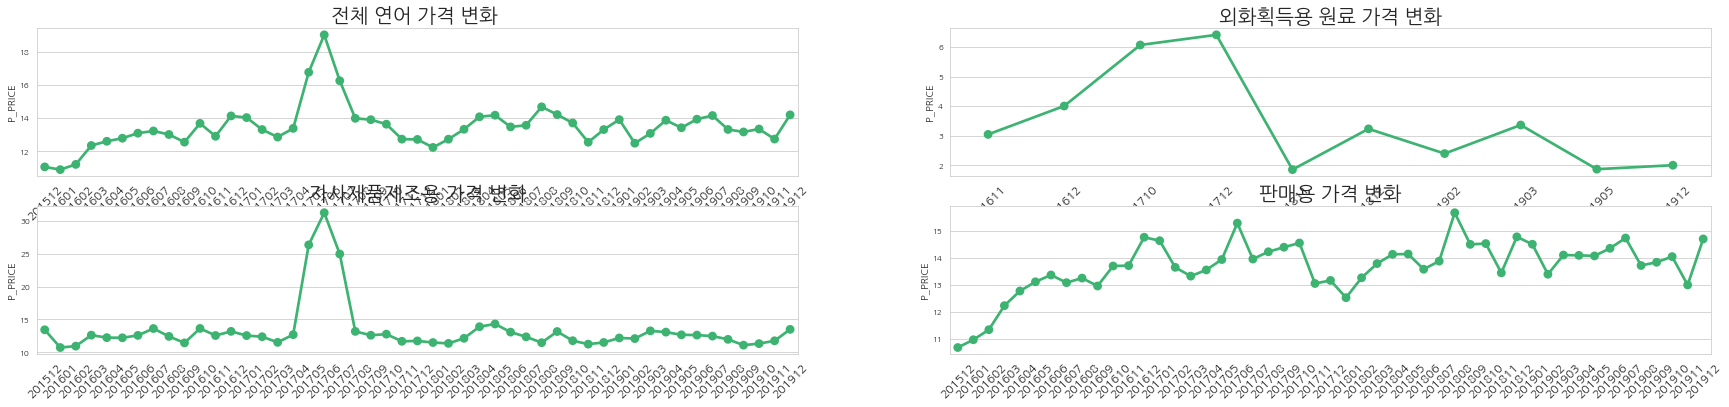

In [17]:
# 용도별 가격 정보
df_one = df_salmon['P_PRICE'].groupby(df_salmon['P_PURPOSE'])
print("---size---")
print(df_one.size())
print("---sum---")
print(df_one.sum())
print("---mean---")
print(df_one.mean())
print("---median---")
print(df_one.median())

plt.figure(figsize=(30, 6))

plt.subplot(221)
sns.pointplot(x='date', y='P_PRICE', data=df_salmon, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.title('전체 연어 가격 변화 ', fontsize=title_size)
#plt.ylim(0,36)

is_one = df_salmon['P_PURPOSE'].str.contains("외화획득용 원료",na=False)
df_one = df_salmon[is_one]

plt.subplot(222)
sns.pointplot(x='date', y='P_PRICE', data=df_one, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('')
plt.title('외화획득용 원료 가격 변화', fontsize=title_size)
#plt.ylim(0,36)

is_one = df_salmon['P_PURPOSE'].str.contains("자사제품제조용",na=False)
df_one = df_salmon[is_one]

plt.subplot(223)
sns.pointplot(x='date', y='P_PRICE', data=df_one, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('')
plt.title('자사제품제조용 가격 변화', fontsize=title_size)
#plt.ylim(0,36)

is_one = df_salmon['P_PURPOSE'].str.contains("판매용",na=False)
df_one = df_salmon[is_one]

plt.subplot(224)
sns.pointplot(x='date', y='P_PRICE', data=df_one, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('')
plt.title('판매용 가격 변화', fontsize=title_size)
#plt.ylim(0,36)

17년 4,5,6,7 년에 연어가격이 급격히 치솟는 구간이 있음

---size---
P_IMPORT_TYPE
냉동              19
냉동,필렛(F)         1
냉장             215
냉장,필렛(F)       210
냉장,필렛(F),횟감     29
Name: P_PRICE, dtype: int64
---max---
P_IMPORT_TYPE
냉동              8.899873
냉동,필렛(F)        9.400137
냉장             13.697301
냉장,필렛(F)       62.457202
냉장,필렛(F),횟감    15.265961
Name: P_PRICE, dtype: float64
---min---
P_IMPORT_TYPE
냉동              2.149987
냉동,필렛(F)        9.400137
냉장              7.287392
냉장,필렛(F)       12.087304
냉장,필렛(F),횟감     6.056909
Name: P_PRICE, dtype: float64
---mean---
P_IMPORT_TYPE
냉동              6.685064
냉동,필렛(F)        9.400137
냉장             10.216443
냉장,필렛(F)       16.899194
냉장,필렛(F),횟감    12.008032
Name: P_PRICE, dtype: float64
---median---
P_IMPORT_TYPE
냉동              6.800000
냉동,필렛(F)        9.400137
냉장             10.001942
냉장,필렛(F)       15.153383
냉장,필렛(F),횟감    12.025189
Name: P_PRICE, dtype: float64


(0.0, 36.0)

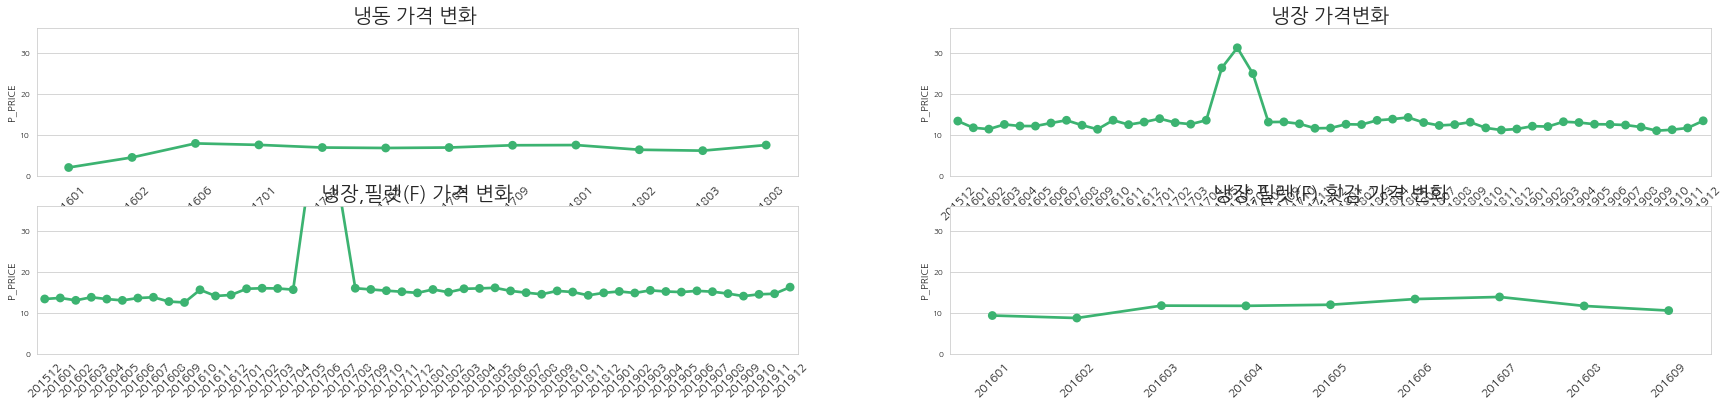

In [18]:
# 자사제품제조용으로 p_import_type 분석
is_one = df_salmon['P_PURPOSE'].str.contains("자사제품제조용",na=False)
df_one = df_salmon[is_one]

df_one

df_two = df_one['P_PRICE'].groupby(df_one['P_IMPORT_TYPE'])
print("---size---")
print(df_two.size())
print("---max---")
print(df_two.max())
print("---min---")
print(df_two.min())
print("---mean---")
print(df_two.mean())
print("---median---")
print(df_two.median())


plt.figure(figsize=(30, 6))

is_one = df_one['P_IMPORT_TYPE'].str.contains("냉동",na=False)
df_two = df_one[is_one]

plt.subplot(221)
sns.pointplot(x='date', y='P_PRICE', data=df_two, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.title('냉동 가격 변화 ', fontsize=title_size)
plt.ylim(0,36)

is_one = df_one['P_IMPORT_TYPE'].str.contains("냉장",na=False)
df_two = df_one[is_one]

plt.subplot(222)
sns.pointplot(x='date', y='P_PRICE', data=df_two, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('')
plt.title('냉장 가격변화', fontsize=title_size)
plt.ylim(0,36)

is_one = df_one['P_IMPORT_TYPE'].str.contains("냉장,필렛",na=False)
df_two = df_one[is_one]

plt.subplot(223)
# plt.plot(df_two['date'],df_two['P_PRICE'])

sns.pointplot(x='date', y='P_PRICE', data=df_two, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('')
plt.title('냉장,필렛(F) 가격 변화', fontsize=title_size)
plt.ylim(0,36)

is_one = df_one['P_IMPORT_TYPE'].str.contains("횟감",na=False)
df_two = df_one[is_one]

plt.subplot(224)
sns.pointplot(x='date', y='P_PRICE', data=df_two, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('')
plt.title('냉장,필렛(F),횟감 가격 변화', fontsize=title_size)
plt.ylim(0,36)

- 냉장,필렛(F),횟감은 16년도 자료밖에 없음
- 냉동은 16,17,18 년도 있음
- 왜 가격이 치솟았는지는 모르겠음

(5.0, 12.0)

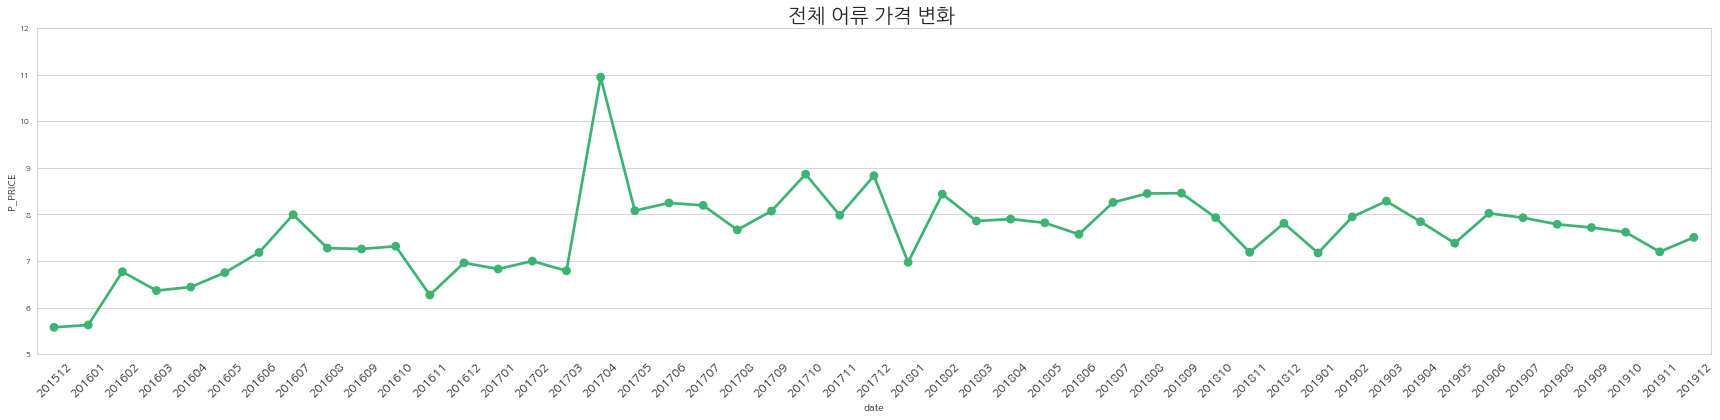

In [19]:
plt.figure(figsize=(30, 6))

sns.pointplot(x='date', y='P_PRICE', data=df_fish, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.title('전체 어류 가격 변화 ', fontsize=title_size)
plt.ylim(5,12)

(5.0, 12.0)

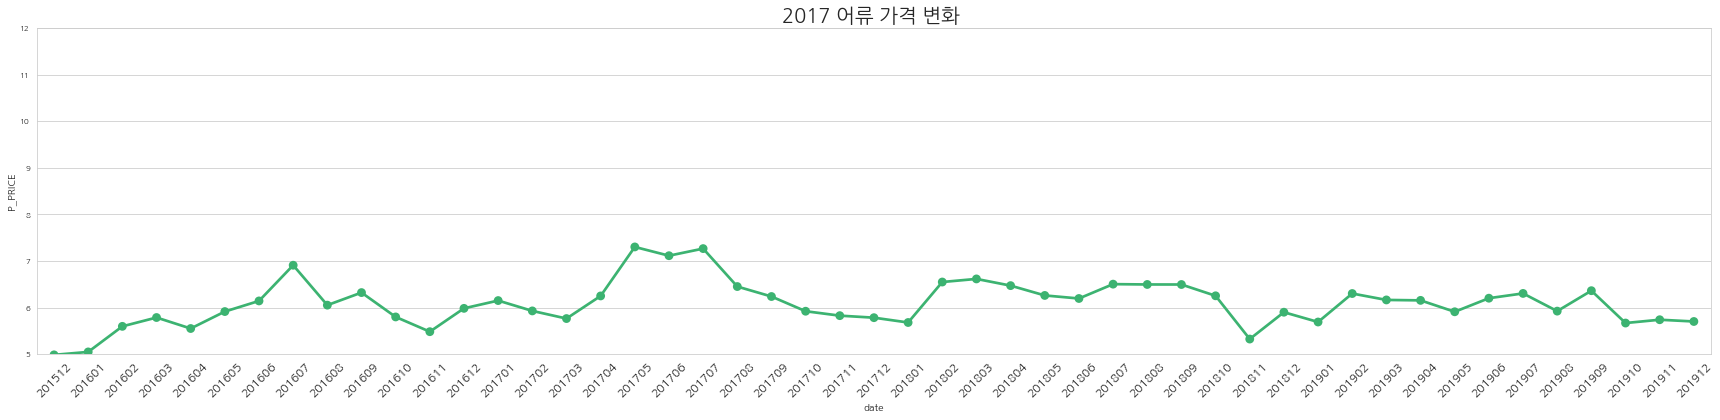

In [20]:
df_fish['is_2017'] = np.where((df_fish.date >= '201512') & (df_fish.date <= '201912') ,'1','0')
is_2017 = df_fish['is_2017'].str.contains('1',na=False)
df_2017 = df_fish[is_2017]
df_2017['isnot_tuna'] = np.where(df_2017['CATEGORY_2'].str.contains('참치',na=False) ,'1','0')
isnot_tuna = df_2017['isnot_tuna'].str.contains('0',na=False)
df_notuna = df_2017[isnot_tuna]


df_two = df_notuna['P_PRICE'].groupby(df_notuna['CATEGORY_2'])
# print("---size---")
# print(df_two.size())
# print("---max---")
# print(df_two.max())
# print("---min---")
# print(df_two.min())
# print("---mean---")
# print(df_two.mean())
# print("---median---")
# print(df_two.median())


plt.figure(figsize=(30, 6))

sns.pointplot(x='date', y='P_PRICE', data=df_notuna, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.title('2017 어류 가격 변화 ', fontsize=title_size)
plt.ylim(5,12)

- 참치를 없애니까 어류2017년에 튀던값이 없어졌다.

---size---
CTRY_1
노르웨이    92
뉴질랜드     1
영국      12
칠레      13
캐나다      4
Name: P_PRICE, dtype: int64
---max---
CTRY_1
노르웨이    62.457202
뉴질랜드    15.000000
영국      13.178097
칠레       8.559971
캐나다     10.458631
Name: P_PRICE, dtype: float64
---min---
CTRY_1
노르웨이     8.469529
뉴질랜드    15.000000
영국       8.554885
칠레       7.000000
캐나다     10.045957
Name: P_PRICE, dtype: float64
---mean---
CTRY_1
노르웨이    19.559550
뉴질랜드    15.000000
영국      10.327285
칠레       8.272827
캐나다     10.248487
Name: P_PRICE, dtype: float64
---median---
CTRY_1
노르웨이    13.683635
뉴질랜드    15.000000
영국      10.282297
칠레       8.432624
캐나다     10.244680
Name: P_PRICE, dtype: float64


Text(0.5, 1.0, '2017 연어 가격 변화 ')

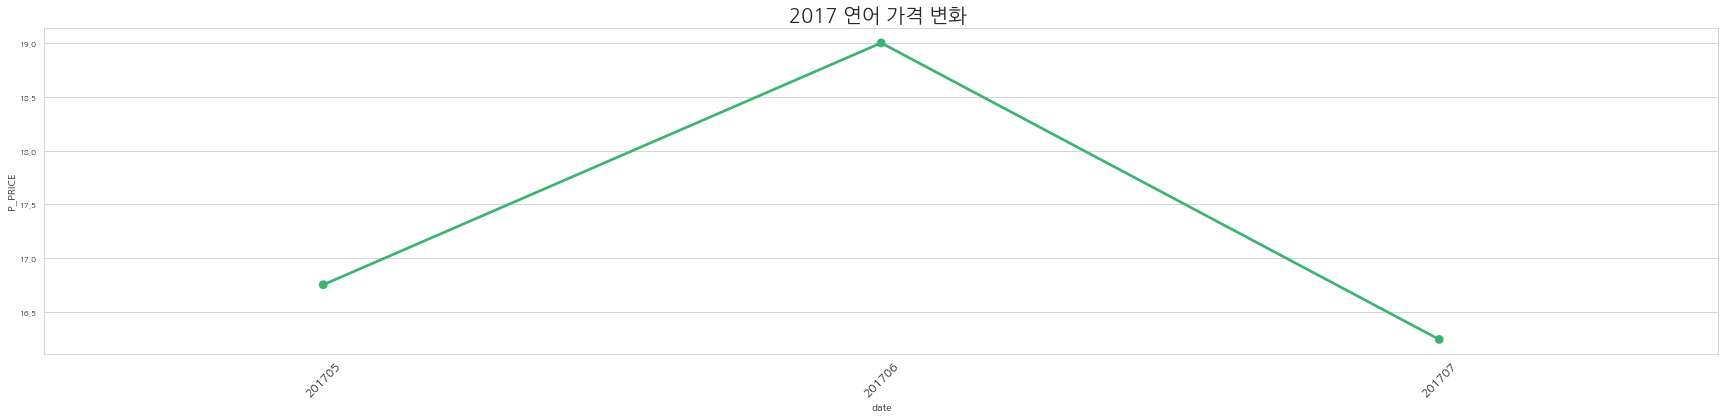

In [21]:
df_salmon['is_2017'] = np.where((df_salmon.date >= '201705') & (df_salmon.date <= '201707') ,'1','0')
is_2017 = df_salmon['is_2017'].str.contains('1',na=False)
df_2017 = df_salmon[is_2017]


df_two = df_2017['P_PRICE'].groupby(df_notuna['CTRY_1'])
print("---size---")
print(df_two.size())
print("---max---")
print(df_two.max())
print("---min---")
print(df_two.min())
print("---mean---")
print(df_two.mean())
print("---median---")
print(df_two.median())


plt.figure(figsize=(30, 6))

sns.pointplot(x='date', y='P_PRICE', data=df_2017, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.title('2017 연어 가격 변화 ', fontsize=title_size)
#plt.ylim(5,12)

In [22]:
# 노르웨이 물가랑 비교하기


# 연어 전체 평가
- 연어는 2017년에 갑자기 가격이 솟구치는 구간이 있다.
- 제조국과 수출국이 다를 때 가격을 알아보려했지만 연어는 제조국과 수출국이 다른 경우가 적다.
- 연어는 가격차이가 별로없는것같다. (2017년 제외)
- 치솟는 연어의 가격은 자사제품용, 노르웨이가 수출국일 때 나타났다.
- 연어의 import_type중 냉장,필렛(F),횟감은 16년도 자료밖에 없다.
- 냉동가격은 보통 낮다.
- 제일 비중이 많은 노르웨이 환율과 눈으로 비교해보았을때 별로 연관이 없는것같았다.
- 연어의 중국 수출? https://m.kati.net/board/exportNewsView.do?board_seq=85540&menu_dept2=35&menu_dept3=71
- 중국의 연어 수입 분석 https://www.giikorea.co.kr/report/cri949828-research-report-on-imported-salmon-china.html

# 갑각류 중 새우 분석

Text(0.5, 1.0, '새우의 P_NAME')

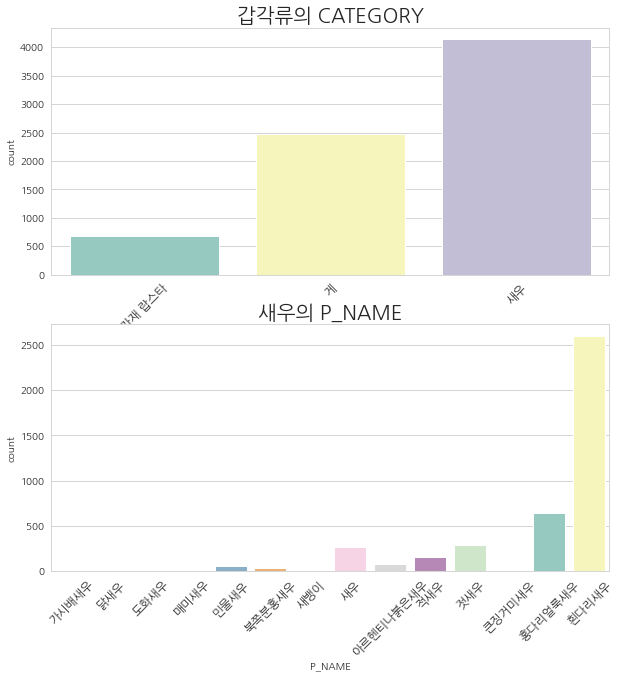

In [23]:
# 어류만 분류
is_crab = df_train['CATEGORY_1'].str.contains("갑각류",na=False)
df_crab = df_train[is_crab]

plt.figure(figsize=(10,10))

plt.subplot(2, 1, 1)
sns.countplot(df_crab['CATEGORY_2'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('갑각류의 CATEGORY', fontsize=title_size)

is_shrimp = df_train['CATEGORY_2'].str.contains("새우",na=False)
df_shrimp = df_train[is_shrimp]

plt.subplot(2, 1, 2)
sns.countplot(df_shrimp['P_NAME'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('새우의 P_NAME', fontsize=title_size)

---size---
CATEGORY_2
가재 랍스타     680
게         2477
새우        4141
Name: P_PRICE, dtype: int64
---max---
CATEGORY_2
가재 랍스타     49.171385
게         133.759700
새우         57.254967
Name: P_PRICE, dtype: float64
---mean---
CATEGORY_2
가재 랍스타    22.786313
게         10.502182
새우         9.501048
Name: P_PRICE, dtype: float64
---median---
CATEGORY_2
가재 랍스타    22.347805
게          4.504950
새우         8.396637
Name: P_PRICE, dtype: float64


(array([ 5., 10., 15., 20., 25., 30.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

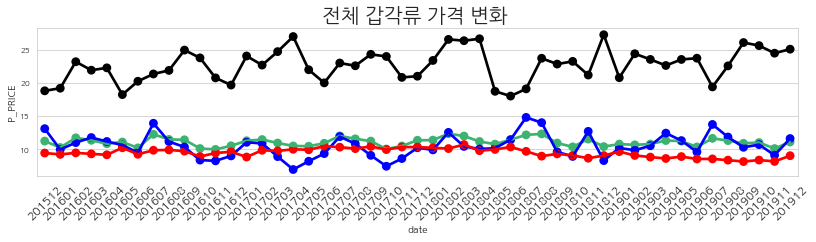

In [24]:
# 연월별 목록별 가격

df_one = df_crab['P_PRICE'].groupby(df_crab['CATEGORY_2'])
print("---size---")
print(df_one.size())
print("---max---")
print(df_one.max())
print("---mean---")
print(df_one.mean())
print("---median---")
print(df_one.median())

plt.figure(figsize=(30, 6))

plt.subplot(221)
sns.pointplot(x='date', y='P_PRICE', data=df_crab, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)
plt.title('전체 갑각류 가격 변화 ', fontsize=title_size)

#df_crab = df_train[df_train['CATEGORY_1'].str.contains("갑각류",na=False)]

sns.pointplot(x='date', y='P_PRICE', data = df_crab[df_crab['CATEGORY_2'].str.contains("가재",na=False)], ci=None, color='black')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)

sns.pointplot(x='date', y='P_PRICE', data = df_crab[df_crab['CATEGORY_2'].str.contains("게",na=False)], ci=None, color='blue')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)

sns.pointplot(x='date', y='P_PRICE', data = df_crab[df_crab['CATEGORY_2'].str.contains("새우",na=False)], ci=None, color='red')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)


In [31]:
df_shrimp.P_NAME.value_counts()

흰다리새우        2601
홍다리얼룩새우       642
젓새우           287
새우            266
적새우           156
아르헨티나붉은새우      79
민물새우           61
북쪽분홍새우         29
새뱅이            10
도화새우            4
큰징거미새우          2
닭새우             2
매미새우            1
가시배새우           1
Name: P_NAME, dtype: int64

(array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

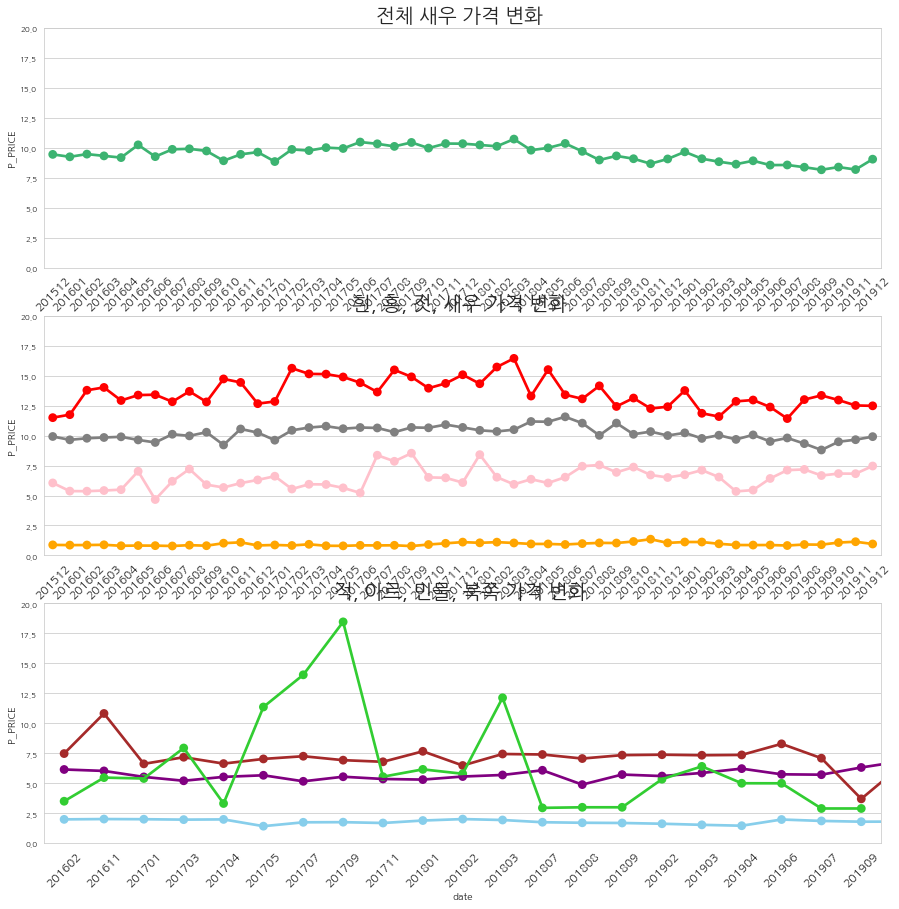

In [69]:
# 새우 품목별 그래프
# df_one = df_shrimp['P_PRICE'].groupby(df_shrimp['P_PURPOSE'])
# print("---size---")
# print(df_one.size())
# print("---sum---")
# print(df_one.sum())
# print("---mean---")
# print(df_one.mean())
# print("---median---")
# print(df_one.median())

plt.figure(figsize=(15, 15))

plt.subplot(311)
plt.title('전체 새우 가격 변화 ', fontsize=title_size)
plt.ylim(0,20)

sns.pointplot(x='date', y='P_PRICE', data=df_shrimp, ci=None, color='mediumseagreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)



plt.subplot(312)
plt.ylim(0,20)
plt.title('흰, 홍, 젓, 새우 가격 변화 ', fontsize=title_size)

sns.pointplot(x='date', y='P_PRICE', data = df_shrimp[df_shrimp['P_NAME'].str.contains("흰다리",na=False)], ci=None, color='gray')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)

sns.pointplot(x='date', y='P_PRICE', data = df_shrimp[df_shrimp['P_NAME'].str.contains("홍다리",na=False)], ci=None, color='red')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)

sns.pointplot(x='date', y='P_PRICE', data = df_shrimp[df_shrimp['P_NAME'].str.contains("젓",na=False)], ci=None, color='orange')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)

sns.pointplot(x='date', y='P_PRICE', data = df_shrimp[df_shrimp['P_NAME'].str.startswith("새우",na=False)], ci=None, color='pink')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)



plt.subplot(313)
plt.ylim(0,20)
plt.title('적, 아르, 민물, 북쪽 가격 변화 ', fontsize=title_size)

sns.pointplot(x='date', y='P_PRICE', data = df_shrimp[df_shrimp['P_NAME'].str.startswith("적",na=False)], ci=None, color='purple')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)

sns.pointplot(x='date', y='P_PRICE', data = df_shrimp[df_shrimp['P_NAME'].str.startswith("아르헨티나",na=False)], ci=None, color='brown')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)

sns.pointplot(x='date', y='P_PRICE', data = df_shrimp[df_shrimp['P_NAME'].str.startswith("민물",na=False)], ci=None, color='skyblue')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)

sns.pointplot(x='date', y='P_PRICE', data = df_shrimp[df_shrimp['P_NAME'].str.startswith("북쪽",na=False)], ci=None, color='limegreen')
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=8)


In [71]:
df_shrimp[df_shrimp['P_NAME'].str.startswith("북쪽",na=False)]

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,date
1390,2016-02-15,수산물,러시아,러시아,외화획득용 원료,갑각류,새우,북쪽분홍새우,냉동,3.505303,201602
8999,2016-11-21,수산물,캐나다,캐나다,판매용,갑각류,새우,북쪽분홍새우,"냉동,자숙",5.474953,201611
10871,2017-01-23,수산물,캐나다,캐나다,판매용,갑각류,새우,북쪽분홍새우,"냉동,자숙",5.401967,201701
12059,2017-03-06,수산물,러시아,러시아,외화획득용 원료,갑각류,새우,북쪽분홍새우,냉동,14.532194,201703
12414,2017-03-20,수산물,캐나다,캐나다,판매용,갑각류,새우,북쪽분홍새우,냉동,2.500000,201703
12653,2017-03-27,수산물,그린란드,덴마크,판매용,갑각류,새우,북쪽분홍새우,냉동,6.800000,201703
13464,2017-04-24,수산물,캐나다,덴마크,판매용,갑각류,새우,북쪽분홍새우,냉동,3.318054,201704
14507,2017-05-29,수산물,러시아,러시아,외화획득용 원료,갑각류,새우,북쪽분홍새우,냉동,11.364654,201705
16319,2017-07-31,수산물,러시아,러시아,외화획득용 원료,갑각류,새우,북쪽분홍새우,냉동,14.048261,201707
17459,2017-09-11,수산물,그린란드,스웨덴,판매용,갑각류,새우,북쪽분홍새우,"냉동,살,자숙",18.462400,201709


In [72]:
df_shrimp.CTRY_1.value_counts()

베트남        1538
태국          857
중국          674
말레이시아       326
에콰도르        198
인도          162
인도네시아        91
아르헨티나        79
사우디아라비아      66
페루           49
필리핀          36
러시아          18
캐나다          12
미국            9
파나마           7
콜롬비아          4
기니            3
그린란드          2
방글라데시         2
시에라리온         2
소말리아          2
대만            1
노르웨이          1
모잠비크          1
니카라과          1
Name: CTRY_1, dtype: int64

Text(0.5, 1.0, '새우 P_IMPORT_TYPE')

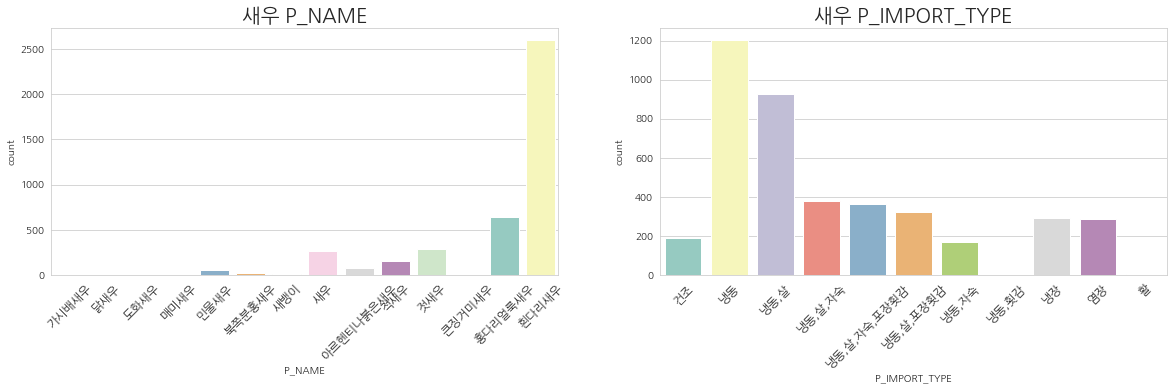

In [79]:
# df_one = df_shrimp['P_PRICE'].groupby(df_shrimp['CTRY_1'])
# print("---size---")
# print(df_one.size())
# print("---max---")
# print(df_one.max())
# print("---mean---")
# print(df_one.mean())
# print("---median---")
# print(df_one.median())

df_shrimp.loc[df_shrimp['CTRY_1']==df_shrimp['CTRY_2'], "comp"] = '같음'
df_shrimp.loc[df_shrimp['CTRY_1']!=df_shrimp['CTRY_2'], "comp"] = '다름'

plt.figure(figsize=(20, 10))

plt.subplot(221)
sns.countplot(df_shrimp['P_NAME'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('새우 P_NAME', fontsize=title_size)

plt.subplot(222)
sns.countplot(df_shrimp['P_IMPORT_TYPE'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('새우 P_IMPORT_TYPE', fontsize=title_size)

Text(0.5, 1.0, '새우 CTRY_2')

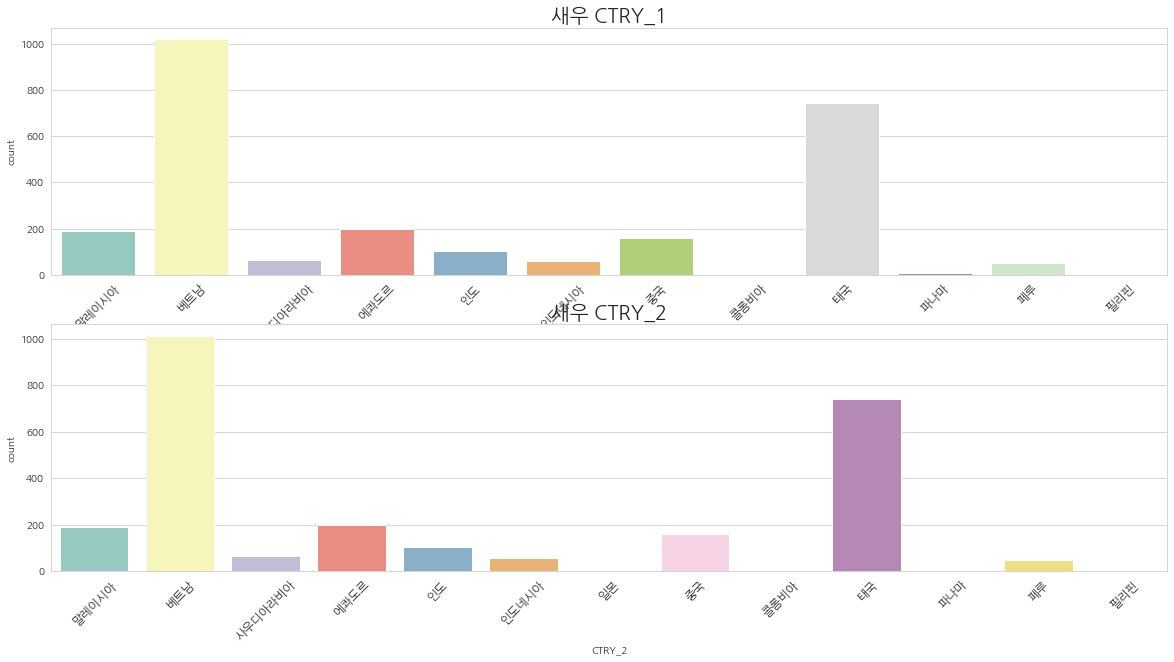

In [130]:
plt.figure(figsize=(20, 10))

plt.subplot(211)
sns.countplot(df_shrimp['CTRY_1'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('새우 CTRY_1', fontsize=title_size)

plt.subplot(212)
sns.countplot(df_shrimp['CTRY_2'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('새우 CTRY_2', fontsize=title_size)

In [97]:
print(df_shrimp['comp'].value_counts())
df_shrimp_d = df_shrimp[df_shrimp.comp.str.contains("다름",na=False)]
df_shrimp_d

같음    4095
다름      46
Name: comp, dtype: int64


,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,date,comp
415,2016-01-11,수산물,아르헨티나,태국,판매용,갑각류,새우,아르헨티나붉은새우,냉동,14.300020,201601,다름
1023,2016-02-01,수산물,아르헨티나,태국,판매용,갑각류,새우,아르헨티나붉은새우,냉동,6.100026,201602,다름
1753,2016-02-29,수산물,베트남,일본,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙,포장횟감",21.521972,201602,다름
5675,2016-07-18,수산물,베트남,일본,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙,포장횟감",24.579832,201607,다름
8804,2016-11-14,수산물,아르헨티나,베트남,판매용,갑각류,새우,아르헨티나붉은새우,"냉동,살",5.649722,201611,다름
9200,2016-11-28,수산물,아르헨티나,베트남,판매용,갑각류,새우,아르헨티나붉은새우,"냉동,살",6.500000,201611,다름
9465,2016-12-05,수산물,소말리아,오만,판매용,갑각류,새우,홍다리얼룩새우,냉동,3.800000,201612,다름
11067,2017-01-30,수산물,아르헨티나,베트남,판매용,갑각류,새우,아르헨티나붉은새우,"냉동,살",8.378111,201701,다름
11420,2017-02-13,수산물,중국,홍콩,판매용,갑각류,새우,민물새우,냉동,2.400000,201702,다름
11977,2017-03-06,수산물,아르헨티나,베트남,판매용,갑각류,새우,아르헨티나붉은새우,"냉동,살",7.955490,201703,다름


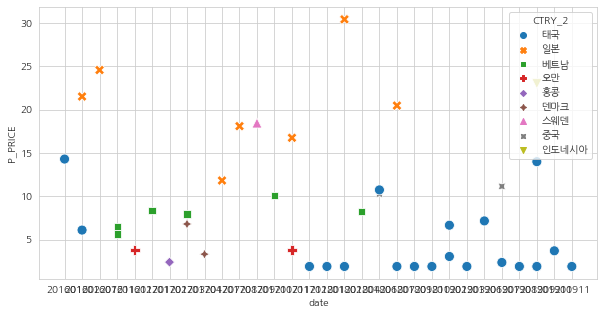

In [127]:
testdata = df_shrimp_d['P_PRICE'].groupby(df_shrimp_d['CTRY_2'])
# print("---size---")
# print(testdata.size())
# print("---max---")
# print(testdata.max())
# print("---mean---")
# print(testdata.mean())
# print("---median---")
# print(testdata.median())

plt.figure(figsize=(10,5))

sns.scatterplot(x='date', 
                y='P_PRICE', 
                hue='CTRY_2', # different colors by group
                style='CTRY_2', # different shapes by group
                s=100, # marker size
                data=df_shrimp_d)
plt.show()

- 제조국과 수출국이다르고 수출국이 일본일 때 가격이 비싸다

# 새우 평가
- 새우 종류가 많아서 보기가 너무 어렵다
- 북쪽분홍새우의 가격이 너무 왓다갓다 차이가 크다 하지만 총평균가격에서는 영향이 없을정도로 양이 작다.


- 각 제조국별로 max값과 차이가 많이나는거는 미국, 캐나다, 태국, 러시아, 베트남이 있다.
- 미국, 캐나다, 러시아는 영향없을정도로 적고 태국, 베트남을 눈여겨 봐야한다.
- 중국은 주요 수출국 3위인 반면 가격의 변화가 많이없다.


- 제조국, 수출국 비율은 비슷하다.
- 제조국, 수출국이 다른곳이 별로 없다.
- 제조국, 수출국이 다른곳의 가격은 평균대비 일본, 스웨덴, 태국이 비싸다.



Text(0.5, 1.0, '흰다리새우 CTRY_2')

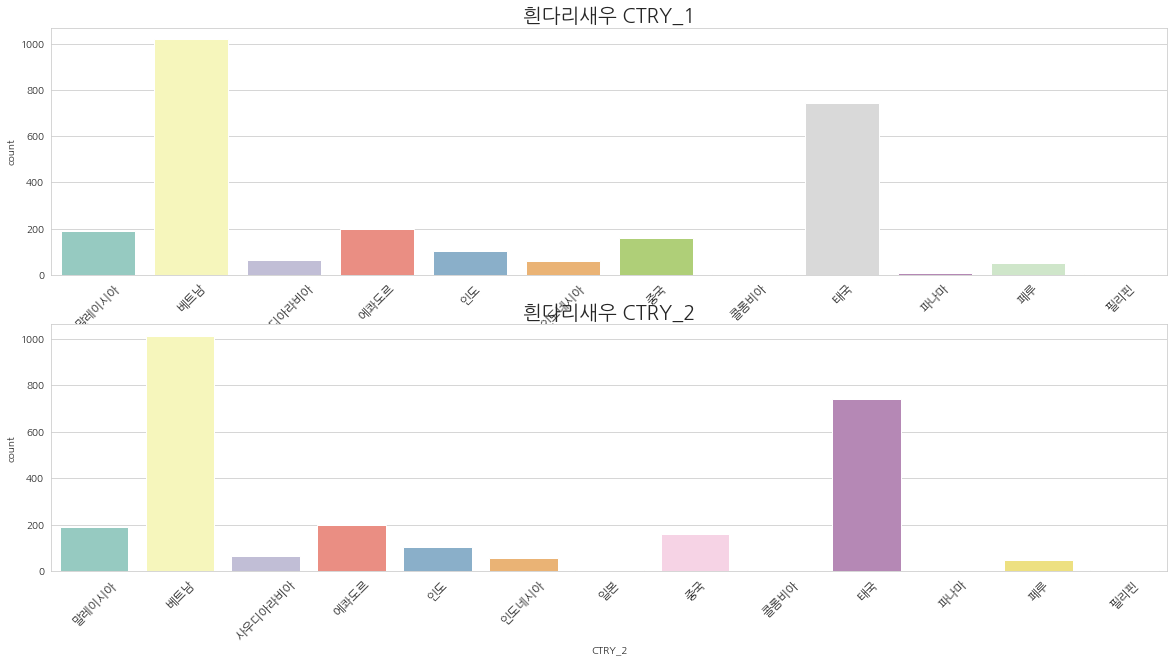

In [132]:
# 흰다리새우
plt.figure(figsize=(20, 10))

df_whiteS = df_shrimp[df_shrimp['P_NAME'].str.contains("흰다리",na=False)]

plt.subplot(211)
sns.countplot(df_whiteS['CTRY_1'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('흰다리새우 CTRY_1', fontsize=title_size)

plt.subplot(212)
sns.countplot(df_whiteS['CTRY_2'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('흰다리새우 CTRY_2', fontsize=title_size)

Text(0.5, 1.0, '오징어 CTRY_2')

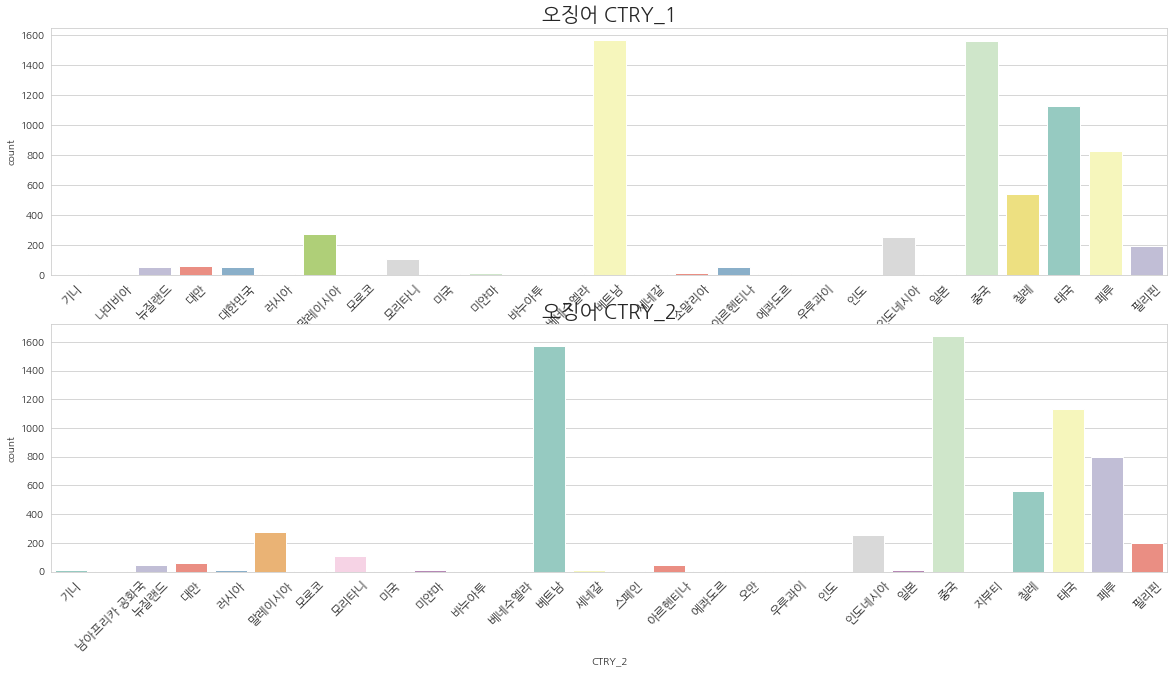

In [133]:
plt.figure(figsize=(20, 10))

df_squ = df_train[df_train['CATEGORY_1'].str.contains("연체",na=False)]

plt.subplot(211)
sns.countplot(df_squ['CTRY_1'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('오징어 CTRY_1', fontsize=title_size)

plt.subplot(212)
sns.countplot(df_squ['CTRY_2'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('오징어 CTRY_2', fontsize=title_size)

Text(0.5, 1.0, '오징어 CATEGORY_2')

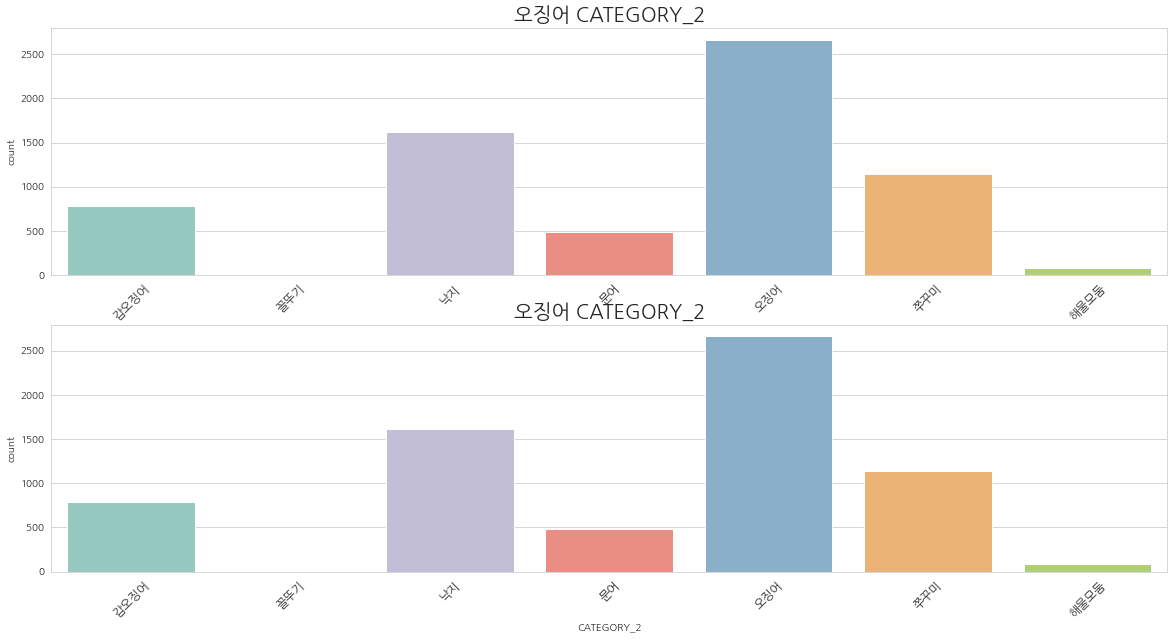

In [134]:
plt.figure(figsize=(20, 10))

df_squ = df_train[df_train['CATEGORY_1'].str.contains("연체",na=False)]

plt.subplot(211)
sns.countplot(df_squ['CATEGORY_2'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('오징어 CATEGORY_2', fontsize=title_size)

plt.subplot(212)
sns.countplot(df_squ['CATEGORY_2'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('오징어 CATEGORY_2', fontsize=title_size)

Text(0.5, 1.0, '오징어 CTRY_2')

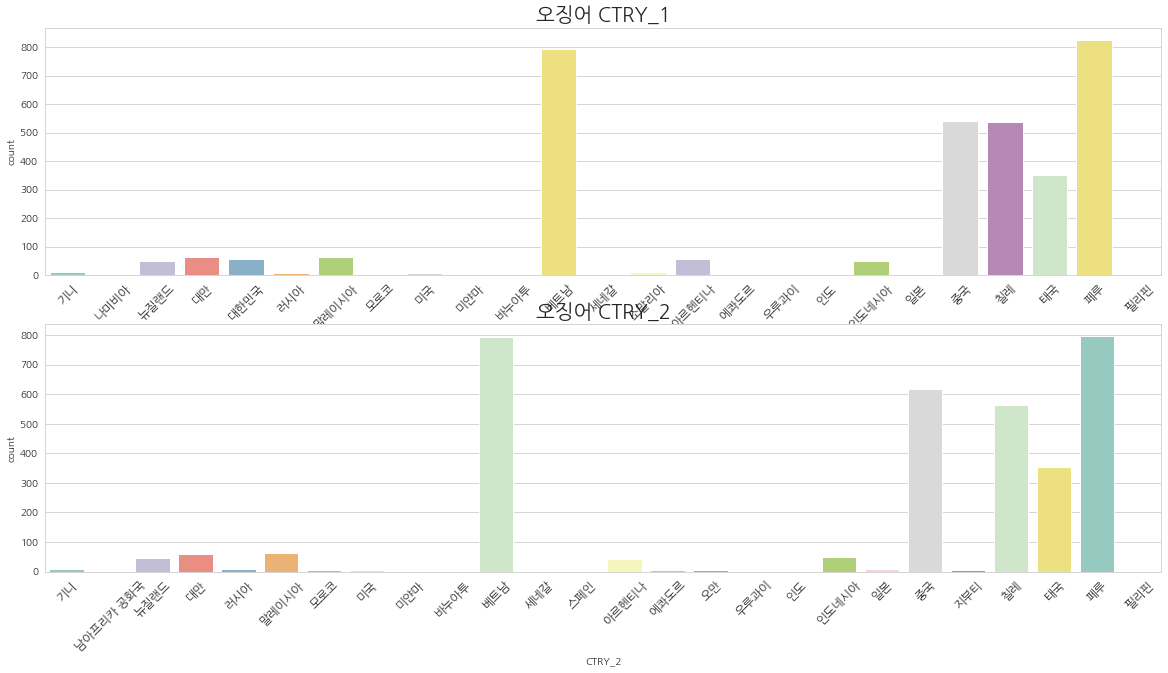

In [143]:
plt.figure(figsize=(20, 10))

df_ozing = df_squ[df_squ['CATEGORY_2'].str.contains("오징어",na=False)]

plt.subplot(211)
sns.countplot(df_ozing['CTRY_1'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('오징어 CTRY_1', fontsize=title_size)

plt.subplot(212)
sns.countplot(df_ozing['CTRY_2'].astype('str').sort_values(), palette=color_palette)
plt.xticks(rotation=45, fontsize=12)
plt.title('오징어 CTRY_2', fontsize=title_size)